## -- Covid-19 EDA --

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Files/Covid-19 dataset/complete.csv")

In [3]:
data.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


#### -- Data Cleaning and Organising --

In [4]:
data.drop(['Latitude','Longitude'],axis=1,inplace=True)
data.rename(columns={'Name of State / UT':'State','Total Confirmed cases':'Confirmed','Cured/Discharged/Migrated':'Cured'},inplace=True)
pd.to_datetime(data['Date'])

,Date
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
4687,2020-08-06
4688,2020-08-06
4689,2020-08-06
4690,2020-08-06


In [5]:
data['State'] = data['State'].replace({'Telangana***':'Telangana','Telengana':'Telangana','Union Territory of Chandigarh':'Chandigarh','Union Territory of Jammu and Kashmir':'Jammu and Kashmir','Union Territory of Ladakh':'Ladakh','Andaman and Nicobar Islands':'Andaman and Nicobar'})

In [6]:
mask = pd.to_numeric(data['Death'], errors='coerce').isnull() & data['Death'].notnull()
display(data[mask])

,Date,State,Confirmed,Death,Cured,New cases,New deaths,New recovered
2241,2020-05-24,Puducherry,26.0,0#,10.0,0,0,0


In [7]:
data.at[2241,'Death'] = '0'

In [8]:
data['Death']=data['Death'].astype('int32')

In [9]:
data.insert(8, 'Recovery Rate', data['Cured']/data['Confirmed']*100)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4692 non-null   object 
 1   State          4692 non-null   object 
 2   Confirmed      4692 non-null   float64
 3   Death          4692 non-null   int32  
 4   Cured          4692 non-null   float64
 5   New cases      4692 non-null   int64  
 6   New deaths     4692 non-null   int64  
 7   New recovered  4692 non-null   int64  
 8   Recovery Rate  4692 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 311.7+ KB


##### -- Grouping Data --

In [11]:
grouped_state = data.drop('Date',axis=1).groupby(['State']).sum()

##### -- Top 10 states with highest no. of deaths --

In [12]:
top_10 = data.groupby(['State'])['Death'].sum().sort_values(ascending=False) [:10]
top_10.head()

,Death
State,
Maharashtra,587648
Delhi,171177
Gujarat,137790
Tamil Nadu,111765
Uttar Pradesh,56959


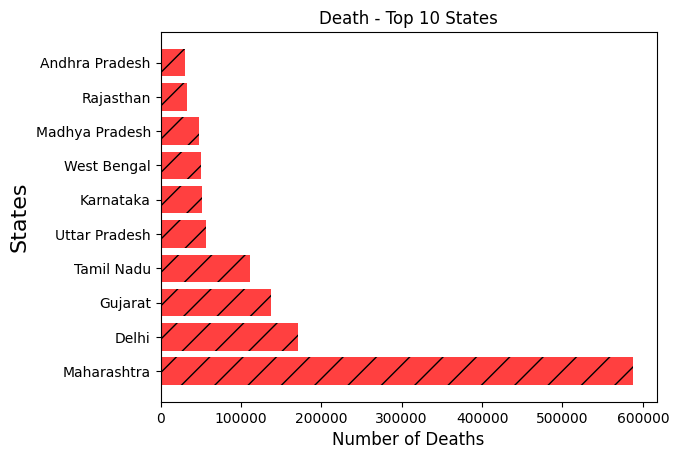

In [13]:
plt.barh(top_10.index, top_10.values, alpha=0.75, color='red', hatch='/')
plt.title('Death - Top 10 States')
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('States', fontsize=16)
plt.show()

#### -- No. of deaths shown on map of India --

In [14]:
import geopandas as gpd

map_india = gpd.read_file('/content/drive/MyDrive/Colab Files/Covid-19 dataset/india_states.geojson')

In [15]:
merged = map_india.merge(grouped_state, left_on='NAME_1', right_on='State', how='left')
merged.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry,Confirmed,Death,Cured,New cases,New deaths,New recovered,Recovery Rate
0,105,IND,India,1,Andaman and Nicobar,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",13569.0,64.0,7390.0,1026.0,0.0,326.0,8568.354453
1,105,IND,India,2,Andhra Pradesh,None,None,State,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",2742054.0,30560.0,1367852.0,186460.0,0.0,104354.0,5097.196985
2,105,IND,India,3,Arunachal Pradesh,None,Agence de la Frontire du Nord-Est(French-obsol...,State,State,"POLYGON ((96.15778 29.3831, 96.1638 29.37668, ...",32082.0,92.0,14309.0,1854.0,0.0,1210.0,5376.350555
3,105,IND,India,4,Assam,None,None,State,State,"MULTIPOLYGON (((89.87145 25.5373, 89.87118 25....",1003558.0,2318.0,686672.0,50452.0,0.0,35892.0,5717.906651
4,105,IND,India,5,Bihar,None,None,State,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",1277395.0,8487.0,823991.0,64768.0,0.0,42414.0,5767.969526


<ipython-input-16-2806627027>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds', 256)


<Axes: >

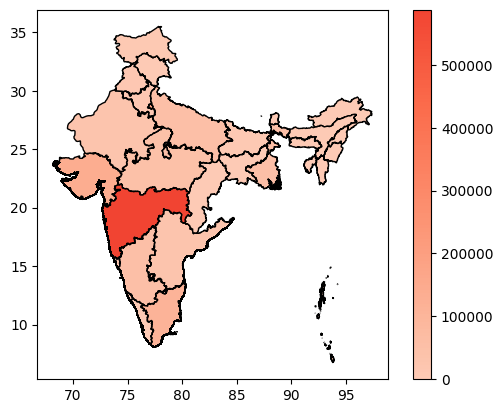

In [16]:
from matplotlib import cm

cmap = cm.get_cmap('Reds', 256)
lighter_reds = cm.colors.ListedColormap(cmap(np.linspace(0.2, 0.6, 256)))

merged.plot(column='Death', cmap=lighter_reds, legend=True, edgecolor='black')

#### -- New Cases Over Time --

In [17]:
grouped_cases = data.groupby(['Date'])['New cases'].sum()
sorted_grouped_cases = grouped_cases.sort_values(ascending=False)
print(f"Highest no. of new cases on {sorted_grouped_cases.index[0]} equal to {sorted_grouped_cases.iloc[0]}")

Highest no. of new cases on 2020-07-18 equal to 70962


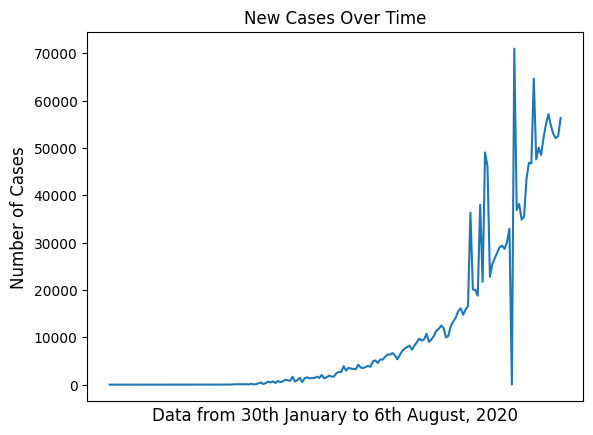

In [18]:
plt.plot(grouped_cases.index, grouped_cases.values)
plt.title('New Cases Over Time')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Data from 30th January to 6th August, 2020', fontsize=12)
plt.xticks([])
plt.show()

#### -- Recovery Rate Over Time --

In [19]:
grouped_recov = data.groupby(['Date'])['Recovery Rate'].sum()

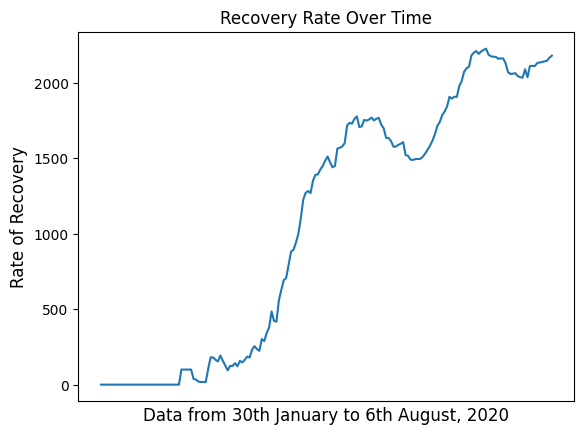

In [20]:
plt.plot(grouped_recov.index, grouped_recov.values)
plt.title('Recovery Rate Over Time')
plt.ylabel('Rate of Recovery', fontsize=12)
plt.xlabel('Data from 30th January to 6th August, 2020', fontsize=12)
plt.xticks([])
plt.show()